In [3]:
import pandas as  pd 
import numpy as np
import re as re 
import mysql.connector as mysql
from mysql.connector import Error
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '',
    'database': 's_crash'
}
connect = mysql.connect(**db_config)
cursor = connect.cursor()
cursor.execute("use s_crash; insert into s_crash{df} ")


In [10]:
df = pd.read_csv('2015washington.csv')
#print(df.columns)

test = df[df['PERSON_COUNT']>=1]
x= df.loc[df['PERSON_COUNT']]
print(x)



     CRASH_CRN  DISTRICT  CRASH_COUNTY  MUNICIPALITY POLICE_AGCY  CRASH_YEAR  \
3   2015000376        12            62         62406       62406        2015   
2   2015000317        12            62         62227       62227        2015   
2   2015000317        12            62         62227       62227        2015   
3   2015000376        12            62         62406       62406        2015   
2   2015000317        12            62         62227       62227        2015   
..         ...       ...           ...           ...         ...         ...   
1   2015000212        12            62         62227       62227        2015   
2   2015000317        12            62         62227       62227        2015   
2   2015000317        12            62         62227       62227        2015   
1   2015000212        12            62         62227       62227        2015   
3   2015000376        12            62         62406       62406        2015   

    CRASH_MONTH  DAY_OF_WEEK  TIME_OF_D

In [9]:
moter = df['MOTORCYCLE_COUNT'].value_counts().sort_index()
print(moter)

MOTORCYCLE_COUNT
0    1863
1      65
2       2
Name: count, dtype: int64


In [37]:
monthC = df['CRASH_MONTH'].value_counts().sort_index()
dayc = df['DAY_OF_WEEK'].value_counts().sort_index()
test = df[['CRASH_MONTH','DAY_OF_WEEK']]
test2 = test.value_counts().sort_index()
test3 = test.groupby(['CRASH_MONTH'])
test4 = test3.value_counts().sort_index()
test_counts = test.groupby(['CRASH_MONTH', 'DAY_OF_WEEK']).size().reset_index(name='count')
#with open('output.txt', 'w') as f:
   # f.write(test4.to_string())  
sorted_test = test_counts.sort_values(by='count', ascending=False)
w = sorted_test.head(10)
sorted_test2 = w.sort_values(by='CRASH_MONTH', ascending=True)
print(sorted_test2)



    CRASH_MONTH  DAY_OF_WEEK  count
6             1            7     54
1             1            2     33
4             1            5     31
13            2            7     37
11            2            5     33
16            3            3     33
18            3            5     32
55            8            7     36
68           10            6     32
82           12            6     32


In [38]:
for _, row in sorted_test2.iterrows():  # '_' is used to ignore the index
    if int(row['count']) > 35:
        print(row['CRASH_MONTH'], row['DAY_OF_WEEK'], row['count'])

# most crashes are sundays in january 
        


1 7 54
2 7 37
8 7 36


In [47]:
new = df[['WEATHER', 'SPEED_LIMIT','MOTORCYCLE_COUNT', 'FATAL_COUNT', 'MAJ_INJ_COUNT']]
new2 = new[new['FATAL_COUNT']>0]
new2.head()

,WEATHER,SPEED_LIMIT,MOTORCYCLE_COUNT,FATAL_COUNT,MAJ_INJ_COUNT
85,1,45.0,0,1,1
155,1,55.0,0,3,0
440,1,55.0,0,1,0
520,4,65.0,0,1,0
547,4,65.0,0,1,0


<Axes: xlabel='WEATHER'>

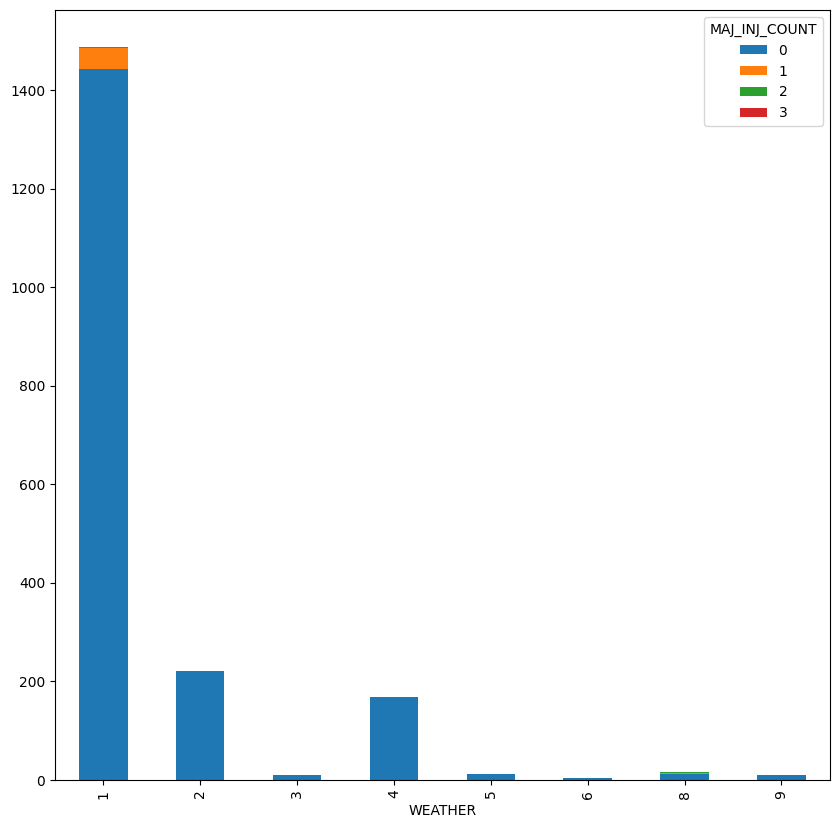

In [50]:
import matplotlib as p 
we = df[['WEATHER', 'MAJ_INJ_COUNT']]
weinj = we.groupby('WEATHER').value_counts().unstack(fill_value=0)
#weinj.head()

weinj.plot(kind='bar', stacked=True, figsize=(10,10))


In [54]:
import sqlite3
from mysql.connector import connect, Error
import time

connect = sqlite3.connect('Crash.db')
cursor = connect.cursor()
WAIT_TIME = 10


num_of_tries = 0
while num_of_tries < WAIT_TIME:
    try:
        mydb = connect(host="127.0.0.1", user="root", db='Crash')
        if mydb.is_connected():
            print("Connected")
            break
    except Error as e:
        print(e)

    num_of_tries += 1
    print("Waiting for MySQL to start")
    time.sleep(1)

if num_of_tries >= WAIT_TIME:
    raise TimeoutError("MySQL is not running")



TypeError: sqlite3.Connection() takes no keyword arguments